 <font size=6> **实验17 聚类与降维**</font>

* 1、理解什么是聚类及聚类的意义、特点；
* 2、掌握K-means算法的基本思想、流程，并能调用API实现，理解基本调参方法；
* 3、理解使用K-means算法解决实际问题的思路、流程；
* 4、理解降维的必要性、主要作用和常用方法；
* 5、理解PCA的思想，掌握 其基本用法，并能对图像进行特征提取。

(实验报告提交题)  olivetti faces是一个知名人脸数据集，它包含40个不同人的400张人脸图片，每个人都有10张不同姿态和表情的人脸图片，每张图片大小为64x64像素，可通过以下方式加载数据集：  
```python
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target
```
要求：先将数据集划分为训练集、测试集，再用SVC对数据集进行分类，得到测试集准确率；再用PCA对训练集、测试集进行降维(100维)，看看降维的准确率是否提高 ，请编程实现。

# 导入库

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# 加载数据

说明：由于网络访问限制，直接获取数据会报错，可通过阿里云或google colab云平台获取数据，或者直接加载.npz文件
```python
faces = np.load('./olivetti.npz')
X = faces['data']
y = faces['target']
```

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


## 探查数据

In [ ]:
len(X[0])

4096

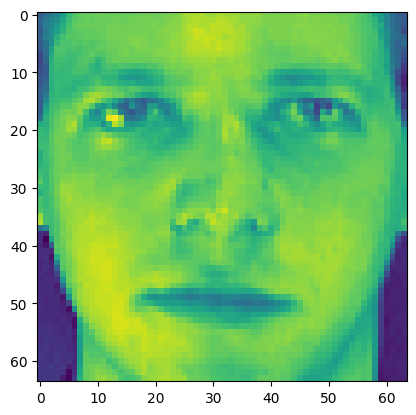

In [ ]:
plt.imshow(X[0].reshape(64,64))

In [ ]:
X[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

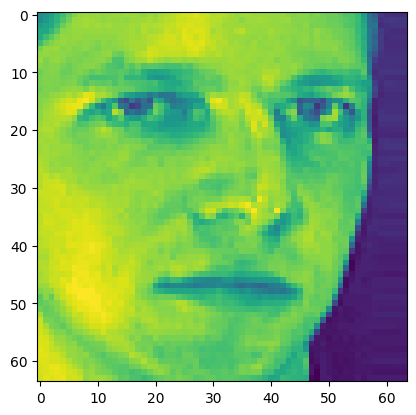

In [ ]:
plt.imshow(X[1].reshape(64,64))

# 建模

## 划分数据集

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 使用SVC分类和评估模型

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [38]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.925


## PCA降维

In [39]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [40]:
X_train_pca[0].shape

(100,)

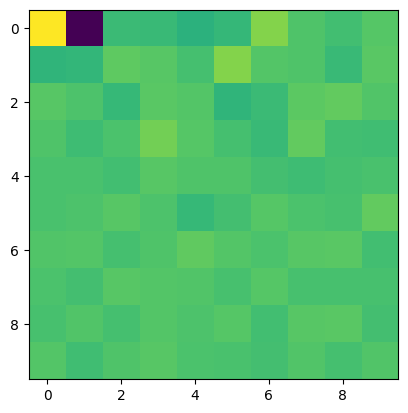

In [41]:
plt.imshow(X_train_pca[0].reshape(10,10))

## 降维后使用SVC分类和评估模型

In [42]:
svc_pca = SVC()
svc_pca.fit(X_train_pca, y_train)
y_pred_pca = svc_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(accuracy_pca)

0.9375


# 提高题

聚类算法经常应用于图像处理，请先阅读“基于聚类的图像分割.pdf”文档，之后运行image_divided.py程序，n值分别输入：2、4、8、16等，再查看生成的图像文件，以此体会KMeans算法，并回答以下问题：
- (1)输入的数值n有何作用？
- (2)程序功能是什么？
- (3)程序的设计思路如何？